In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [15]:
directory = '../dataset/new/'
stocks = ['FORD.csv', 'GM.csv', 'TSLA.csv']
stocks = [directory + s for s in stocks]
stocks

['../dataset/new/FORD.csv', '../dataset/new/GM.csv', '../dataset/new/TSLA.csv']

In [16]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]

In [17]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

,Close_x,Close_y,Close
0,1.67,21.049999,5.616
1,1.66,21.150000,5.542
2,1.67,22.170000,5.424
3,1.67,22.920000,5.382
4,1.75,22.840000,5.450


In [18]:

returns = data.pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [19]:
cov_matrix


,Close_x,Close_y,Close
Close_x,0.001570,0.000043,0.000036
Close_y,0.000043,0.000303,0.000128
Close,0.000036,0.000128,0.001296


In [20]:
num_portfolios = 25000
results = np.zeros((3,num_portfolios))

In [21]:
for i in range(num_portfolios):
    weights = np.random.random(cov_matrix.shape[0])
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]

In [22]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

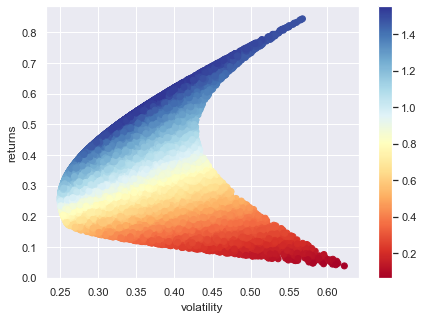

In [23]:
plt.figure(figsize = (7, 5))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()
plt.xlabel('volatility')
plt.ylabel('returns')
plt.show()